In [1]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [12, 4]
from sklearn import datasets


In [2]:
diabetes = datasets.load_diabetes(as_frame=True)


In [16]:
from sklearn.preprocessing import QuantileTransformer

In [20]:
# Load the diabetes dataset
diabetes_X, diabetes_y = diabetes.data, diabetes.target
# create a binary risk feature
diabetes_y_risk = diabetes_y.copy()
diabetes_y_risk[:] = 0
diabetes_y_risk[diabetes_y > 150] = 1
# Print part of the dataset
diabetes_y_risk.head()

0    1.0
1    0.0
2    0.0
3    1.0
4    0.0
Name: target, dtype: float64

In [18]:
q  = QuantileTransformer()
df = diabetes.data
X = q.fit_transform(df)
transformedDF = q.transform(X)
transformedDF = pd.DataFrame(X)
transformedDF.columns = ['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']

C:\Users\spec\anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:2583: UserWarning: n_quantiles (1000) is greater than the total number of samples (442). n_quantiles is set to n_samples.
  warnings.warn(
C:\Users\spec\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but QuantileTransformer was fitted with feature names
  warnings.warn(


In [19]:
transformedDF.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.755102,1.0,0.894558,0.678005,0.172336,0.214286,0.168934,0.526077,0.663265,0.345805
1,0.439909,0.0,0.133787,0.323129,0.439909,0.359410,0.943311,0.225624,0.064626,0.019274
2,0.986395,1.0,0.809524,0.502268,0.160998,0.224490,0.267574,0.526077,0.544218,0.289116
3,0.038549,0.0,0.447846,0.242630,0.628118,0.726757,0.240363,0.774376,0.675737,0.416100
4,0.497732,0.0,0.233560,0.678005,0.572562,0.641723,0.609977,0.526077,0.263039,0.170068


In [22]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(transformedDF, diabetes_y_risk, test_size=0.30, random_state=7)

In [26]:
# Modeling
from sklearn.preprocessing import QuantileTransformer
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
import seaborn as sns
from sklearn.model_selection import GridSearchCV, cross_val_score, StratifiedKFold, learning_curve, train_test_split

In [45]:
def evaluate_model(models):
    """
    Takes a list of models and returns chart of cross validation scores using mean accuracy
    """
    
    # Cross validate model with Kfold stratified cross val
    kfold = StratifiedKFold(n_splits = 10)
    
    result = []
    for model in models :
        result.append(cross_val_score(estimator = model, X = x_train, y = y_train, scoring = "accuracy", cv = kfold, n_jobs=4))

    cv_means = []
    cv_std = []
    for cv_result in result:
        cv_means.append(cv_result.mean())
        cv_std.append(cv_result.std())

    result_df = pd.DataFrame({
        "CrossValMeans":cv_means,
        "CrossValerrors": cv_std
    })

    # Generate chart
    #bar = sns.barplot(x = "CrossValMeans", y = "Models", data = result_df, orient = "h")
    #bar.set_xlabel("Mean Accuracy")
    #bar.set_title("Cross validation scores")
    return result_df

In [51]:
# Modeling step Test differents algorithms 
random_state = 30
models = [
    DecisionTreeClassifier(random_state = random_state),
    RandomForestClassifier(random_state = random_state),
    DecisionTreeRegressor(random_state = random_state,)
]
evaluate_model(models)

,CrossValMeans,CrossValerrors
0,0.659892,0.072732
1,0.744516,0.064658
2,0.656667,0.074017


In [15]:
diabetes_y_risk

0      1.0
1      0.0
2      0.0
3      1.0
4      0.0
      ... 
437    1.0
438    0.0
439    0.0
440    1.0
441    0.0
Name: target, Length: 442, dtype: float64

In [11]:
from matplotlib import pyplot as plt
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.tree import DecisionTreeRegressor
# create and fit the model
clf = DecisionTreeRegressor()
clf.fit(diabetes_X.iloc[:,:], diabetes_y_risk)

DecisionTreeRegressor()

IndexError: index 8 is out of bounds for axis 0 with size 4

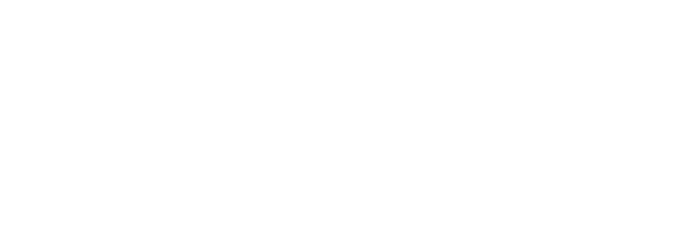

In [14]:
plot_tree(clf, feature_names=diabetes_X.columns[:4], impurity=False)
print('')